# Predição de Diabetes Melitus em pacientes com Machine Learning


---



# Dicionário de dados:
Pregnancies = Quantidade de gestações

Glucose = Nível de glicose no sangue

BloodPressure = Pressão arterial

SkinThickness = Espessura da pele

Insulin = Insulina

BMI = índice de massa corporal

DiabetesPedigreeFunction= Avalia a probabilidade de diabetes com base na familia.

Age = Idade

Outcome = Resultado da nossa variável target, 1 é Sim e 0 é Não

# Sobre o Dataset
Dataset de diabetes, coletado no hospital de Frankufurt na Alemanha


# Importação das Bibliotecas

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Carregamento dos dados

In [230]:
df = pd.read_csv('/content/diabetes.csv')

In [231]:
print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

# Pré-Processamento de dados




<Axes: >

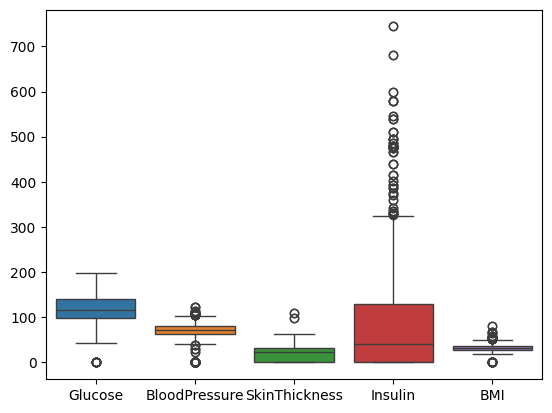

In [232]:
colunas_1 = [df.Glucose,df.BloodPressure,df.SkinThickness,df.Insulin,df.BMI]

sns.boxplot(data = colunas_1)

Com o carregamento do dataset, percebe-se que existem alguns valores nulos para os campos: Glucose, BloodPressure, SkinThickness, Insulin ou BMI. Para que nosso resultado não seja influenciado por essas ausências, iremos excluir pacientes com informações ausentes.
Observa-se também a presença de muitos outliers na coluna de Insulina.

In [233]:
novo_df = df[(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]] != 0).all(axis=1)]

In [234]:
novo_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,1,139,62,41,480,40.7,0.536,21,0
8,2,83,65,28,66,36.8,0.629,24,0
11,4,125,70,18,122,28.9,1.144,45,1
15,2,81,72,15,76,30.1,0.547,25,0
16,7,195,70,33,145,25.1,0.163,55,1
...,...,...,...,...,...,...,...,...,...
1992,6,134,70,23,130,35.4,0.542,29,1
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1


Análise das váriaveis

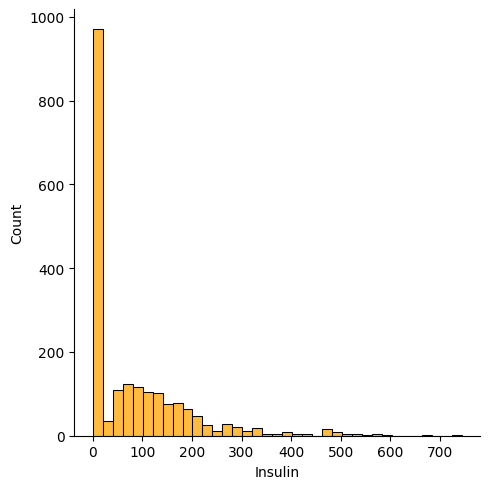

In [235]:
sns.displot(df['Insulin'],color="orange")

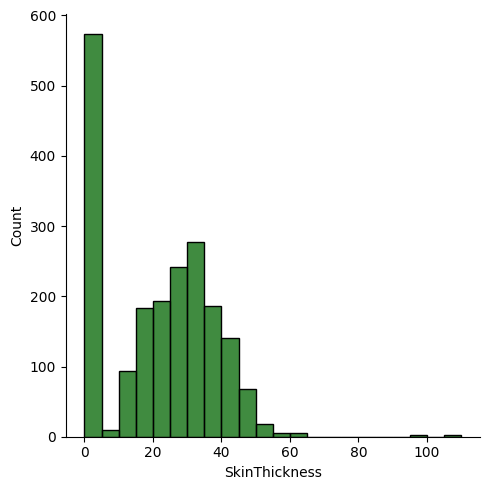

In [236]:
sns.displot(df['SkinThickness'],color="darkgreen")

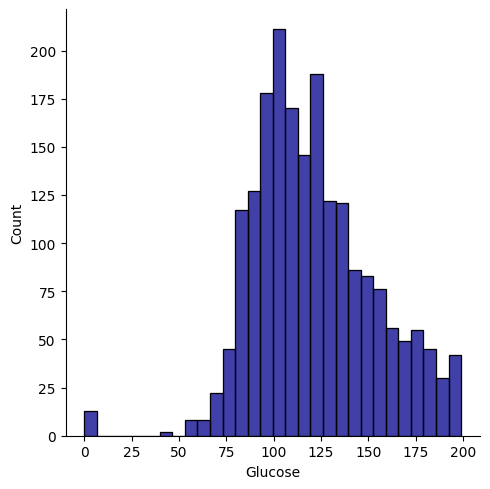

In [237]:
sns.displot(df['Glucose'],color = "darkblue")

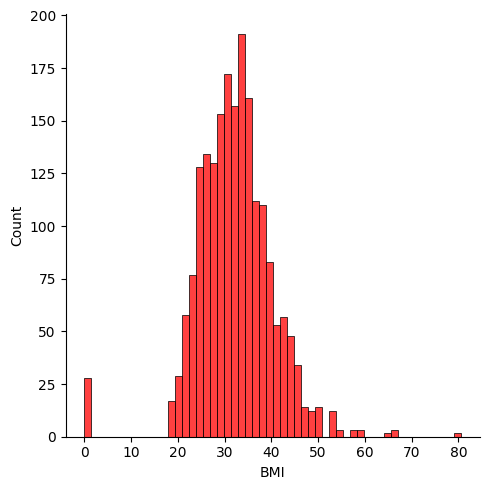

In [238]:
sns.displot(df['BMI'],color = "red")

Divisão da base para treinamento e teste

In [239]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,1,139,62,41,480,40.7,0.536,21
8,2,83,65,28,66,36.8,0.629,24
11,4,125,70,18,122,28.9,1.144,45
15,2,81,72,15,76,30.1,0.547,25
16,7,195,70,33,145,25.1,0.163,55
...,...,...,...,...,...,...,...,...
1992,6,134,70,23,130,35.4,0.542,29
1994,1,79,60,42,48,43.5,0.678,23
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36


# Análise de correlação

In [240]:
corr = novo_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.235092,0.279361,0.191280,0.095914,0.110123,0.031454,0.680675,0.309549
Glucose,0.235092,1.000000,0.208205,0.226430,0.568677,0.208794,0.098999,0.322793,0.527694
BloodPressure,0.279361,0.208205,1.000000,0.229885,0.098523,0.265245,0.004257,0.353685,0.255900
SkinThickness,0.191280,0.226430,0.229885,1.000000,0.230739,0.628358,0.126773,0.245484,0.277142
Insulin,0.095914,0.568677,0.098523,0.230739,1.000000,0.294086,0.178104,0.145621,0.324783
BMI,0.110123,0.208794,0.265245,0.628358,0.294086,1.000000,0.126629,0.123897,0.269254
DiabetesPedigreeFunction,0.031454,0.098999,0.004257,0.126773,0.178104,0.126629,1.000000,0.075922,0.174390
Age,0.680675,0.322793,0.353685,0.245484,0.145621,0.123897,0.075922,1.000000,0.394437
Outcome,0.309549,0.527694,0.255900,0.277142,0.324783,0.269254,0.174390,0.394437,1.000000


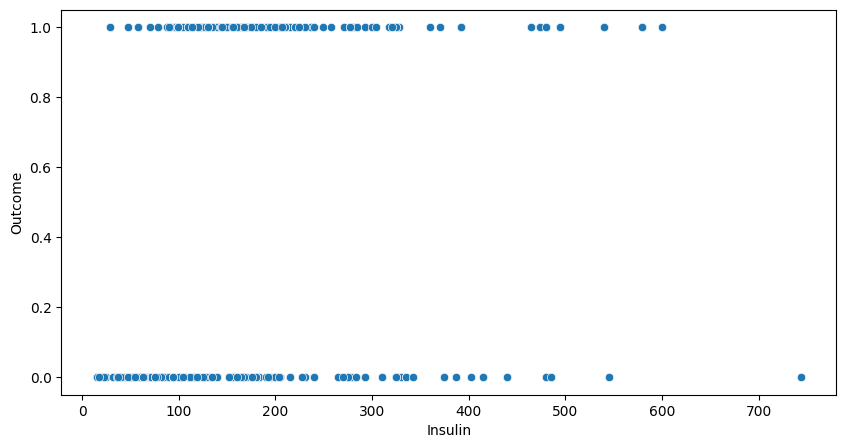

In [241]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=novo_df,x='Insulin',y='Outcome');

Separação das variáveis dependentes e independentes

X: Independentes

y: Dependente

In [242]:
novo_df = novo_df.select_dtypes(include=[np.number])
novo_df = novo_df.dropna(axis="columns", how="any")

X = novo_df.drop(columns=["Outcome"])

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,1,139,62,41,480,40.7,0.536,21
8,2,83,65,28,66,36.8,0.629,24
11,4,125,70,18,122,28.9,1.144,45
15,2,81,72,15,76,30.1,0.547,25
16,7,195,70,33,145,25.1,0.163,55
...,...,...,...,...,...,...,...,...
1992,6,134,70,23,130,35.4,0.542,29
1994,1,79,60,42,48,43.5,0.678,23
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36


In [243]:
y

4       0
8       0
11      1
15      0
16      1
       ..
1992    1
1994    0
1995    0
1996    1
1999    0
Name: Outcome, Length: 876, dtype: int64

In [244]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    X,
    y, test_size=0.20
)

Funcao_logistica = LogisticRegression()

Funcao_logistica.fit(x_treino,y_treino)

LogisticRegression()

Avaliando modelo

In [245]:
previsoes = Funcao_logistica.predict(x_teste)
previsoes

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

Comparando modelo

In [246]:
y_teste

348     0
1074    0
1580    1
320     0
1680    1
       ..
515     1
243     1
633     0
175     1
1111    0
Name: Outcome, Length: 176, dtype: int64

# Matriz de Confusão

---




É uma tabela que nos mostra a frequência de classificação para cada classe do modelo, podendo ser:

**Verdadeiro positivo** (true positive - TP): Quando a classe que estamos buscando foi corretamente classificada

**Falso positivo** (false positive - FP): Quando a classe que estamos buscando foi classificada incorretamente.

**Falso verdadeiro** (true negative - TN): Quando a classe que não estamos buscando foi prevista corretamente.

**Falso negativo** (false negative - FN): Quando a classe que não estamos buscando foi classificada incorretamente.

In [247]:
# Gerando matris de confusão
cm = confusion_matrix(y_teste,previsoes)
cm

array([[110,  12],
       [ 31,  23]])

In [248]:
# Exibindo relatorio de classificação
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       122
           1       0.66      0.43      0.52        54

    accuracy                           0.76       176
   macro avg       0.72      0.66      0.68       176
weighted avg       0.74      0.76      0.74       176



Extraindo variáveis VN, FP, FN e VP



In [249]:
VN, FP, FN, VP = cm.ravel()

# Exibindo os valores
print(f"Verdadeiro Positivo (VP): {VP}")
print(f"Verdadeiro Negativo (VN): {VN}")
print(f"Falso Positivo (FP): {FP}")
print(f"Falso Negativo (FN): {FN}")

Verdadeiro Positivo (VP): 23
Verdadeiro Negativo (VN): 110
Falso Positivo (FP): 12
Falso Negativo (FN): 31


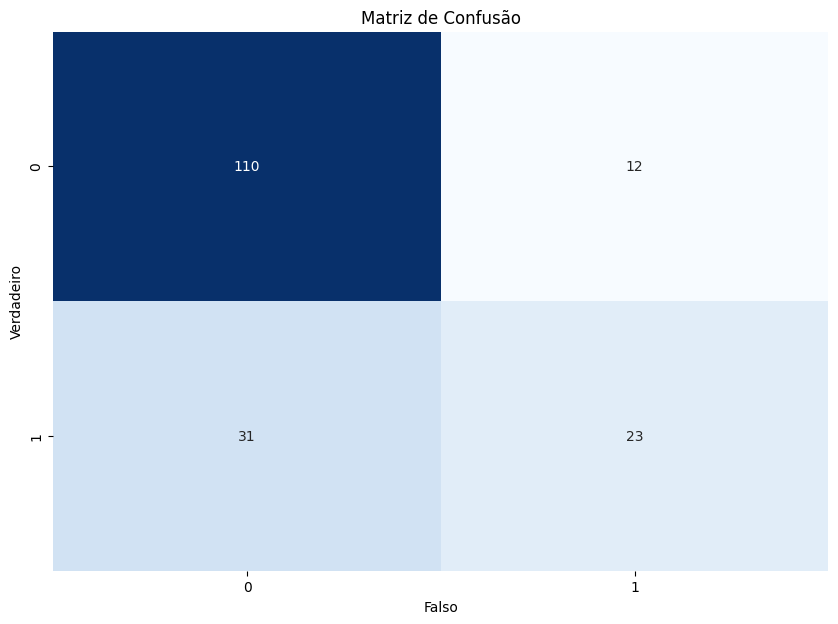

In [250]:
# Plotando Matriz de Confusão

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Falso")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

Cálculo de métricas de sensibilidade, especifidade, acurácia, presisão e F-score


In [251]:
# Sensibilidade (Recall)
sensibilidade = VP / (VP + FN)
print(f"Sensibilidade: {sensibilidade}")

# Especificidade
especificidade = VN / (VN + FP)
print(f"Especificidade: {especificidade}")

# Calculando a acurácia
acuracia = (VP + VN) / (VP + VN + FP + FN)
print(f"Acurácia: {acuracia}")

# Presisão
precisao = VP / (VP + FP)
print(f"Precisão: {precisao}")

# F-Score
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
print(f"F1-Score: {f1_score}")

Sensibilidade: 0.42592592592592593
Especificidade: 0.9016393442622951
Acurácia: 0.7556818181818182
Precisão: 0.6571428571428571
F1-Score: 0.6470588235294118
